<a href="https://colab.research.google.com/github/FerbeiPatricia/PMP-2024/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.7 MB/s eta 0:00:00


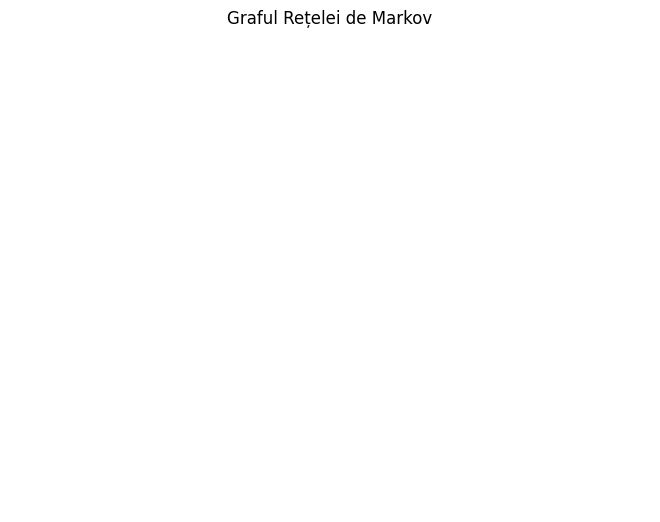

Clicile rețelei Markov: [['A1', 'A2'], ['A1', 'A3'], ['A4', 'A5'], ['A4', 'A3'], ['A5', 'A2']]


In [3]:
# Importăm bibliotecile necesare din pgmpy pentru a construi graful Markov și a-l vizualiza
from pgmpy.models import MarkovModel
import networkx as nx
import matplotlib.pyplot as plt

# Definim graful pentru rețeaua de Markov cu variabilele A1, A2, A3, A4, A5
edges = [
    ('A1', 'A2'), ('A1', 'A3'),
    ('A2', 'A5'),
    ('A3', 'A4'),
    ('A4', 'A5')
]

# Creăm modelul Markov
markov_model = MarkovModel(edges)

# Vizualizăm graful
pos = nx.spring_layout(markov_model)  # poziționarea nodurilor
nx.draw(markov_model, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=14, font_weight='bold', edge_color='gray')
plt.title('Graful Rețelei de Markov')
plt.show()

# Determinăm clicile (utilizând cliques din nx pentru simplitate)
cliques = list(nx.find_cliques(markov_model))
print("Clicile rețelei Markov:", cliques)


In [4]:
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

# Definim potențialele pentru fiecare clică
factor_A1_A2 = DiscreteFactor(['A1', 'A2'], [2, 2], values=[1, 0.5, 0.5, 1])
factor_A1_A3 = DiscreteFactor(['A1', 'A3'], [2, 2], values=[1, 0.5, 0.5, 1])
factor_A2_A5 = DiscreteFactor(['A2', 'A5'], [2, 2], values=[1, 0.8, 0.8, 1])
factor_A3_A4 = DiscreteFactor(['A3', 'A4'], [2, 2], values=[1, 0.7, 0.7, 1])
factor_A4_A5 = DiscreteFactor(['A4', 'A5'], [2, 2], values=[1, 0.6, 0.6, 1])

# Adăugăm factorii la model
markov_model.add_factors(factor_A1_A2, factor_A1_A3, factor_A2_A5, factor_A3_A4, factor_A4_A5)

# Folosim algoritmul de inferență BeliefPropagation pentru a calcula probabilitatea comună și stările de probabilitate maximă
bp = BeliefPropagation(markov_model)

# Calculăm probabilitatea comună pentru toate variabilele
joint_prob = bp.query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])

# Afișăm probabilitățile marginale pentru fiecare variabilă
for var in ['A1', 'A2', 'A3', 'A4', 'A5']:
    print(f"Marginala pentru {var}:")
    print(bp.query(variables=[var]))

# Stările de probabilitate maximă (MAP)
map_states = bp.map_query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])
print("Stările de probabilitate maximă (MAP):", map_states)


Marginala pentru A1:
+-------+-----------+
| A1    |   phi(A1) |
+=======+===========+
| A1(0) |    0.5000 |
+-------+-----------+
| A1(1) |    0.5000 |
+-------+-----------+
Marginala pentru A2:
+-------+-----------+
| A2    |   phi(A2) |
+=======+===========+
| A2(0) |    0.5000 |
+-------+-----------+
| A2(1) |    0.5000 |
+-------+-----------+
Marginala pentru A3:
+-------+-----------+
| A3    |   phi(A3) |
+=======+===========+
| A3(0) |    0.5000 |
+-------+-----------+
| A3(1) |    0.5000 |
+-------+-----------+
Marginala pentru A4:
+-------+-----------+
| A4    |   phi(A4) |
+=======+===========+
| A4(0) |    0.5000 |
+-------+-----------+
| A4(1) |    0.5000 |
+-------+-----------+
Marginala pentru A5:
+-------+-----------+
| A5    |   phi(A5) |
+=======+===========+
| A5(0) |    0.5000 |
+-------+-----------+
| A5(1) |    0.5000 |
+-------+-----------+
Stările de probabilitate maximă (MAP): {'A1': 0, 'A2': 0, 'A3': 0, 'A4': 0, 'A5': 0}
